<a href="https://colab.research.google.com/github/LeninPA/math_applications/blob/main/systems_biology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python practical for systems biology course

## Prof. Robert Endres

## Instructions
Please fill in the gaps in the code as indicated in the provided *Jupyter notebook* using Python 3

## 1. Random variables
At the molecular level, most processes in biology are random (random molecular collisions or diffusion of molecules), and so we need to familiarise ourselves with these using random numbers. Random numbers can also be used to calculate integrals. Via libraries such as *numpy*, Python has a number of different distributions from which to draw random numbers, and random numbers can be discrete or continuous.

**Question:** Here we aim to calculate the area of a circle with radius 1 using Monte Carlo integration (random numbers). For this purpose we put the circle in a square of length 2, draw 1,000 random numbers from an uniform distribution between $[-1, 1]$ in two dimensions, and calculate the ratio of the number of points inside the circle $(x^2 + y^2 \leq 1)$ and total number of points in square. The area of the circle is then the area of the square times the ratio.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# >>>>>> Students: follow instructions from text to estimate area of a circle of radius 1



# <<<<<<<<

3.16

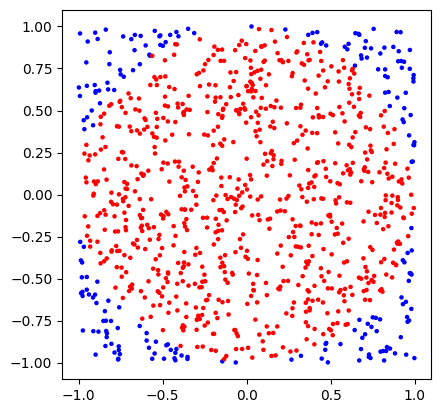

In [ ]:
def area_circ_montecarlo(n:int = 1000, radius:int = 1, graph = True) -> float:
  """Calculates area of a circle through montecarlo"""
  x,y = np.random.uniform(-radius,radius,n),np.random.uniform(-radius,radius,n)
  points_in_circle = 0
  for i in range(n):
    if x[i]**2 + y[i]**2 <= radius**2:
      points_in_circle += 1
  if graph:
    col = np.where(x**2 + y**2 <= radius**2, 'r', 'b')
    plt.gca().set_aspect('equal')
    plt.scatter(x,y, c=col, s=5)
  return 4*(radius**2)*(points_in_circle/n)

area_circ_montecarlo()

## 2. Solving higher-order differential equations

The van der Pol oscillator was originally “discovered” by the Dutch electrical engineer and physicist Balthasar Van der Pol. Van der Pol found stable oscillations, now known as limit cycles, in electrical circuits employing vacuum tubes. His findings were reported in the September 1927 issue of Nature. The van der Pol equation has a long history of being used in both the physical and biological sciences. For instance, in biology Fitzhugh and Nagumo extended the equation in a planar field as a model for action potentials of neurons. The equation has also been utilised in seismology to model the two plates in a geological fault, as well as to model excitations in social amoeba.

Rewrite the following second-order differential equation (ODE) for $y(t)$ in terms of a system of first-order ODEs for $y_1(t)$ and $y_2(t)$

\begin{equation}
\frac{d^2y}{dt^2}-\left(1-y^2\right)\frac{dy}{dt}+y=0
\end{equation}

**Question:** Complete the program which solves the ODEs with Python’s ODE solver *odeint* from the *scipy* library and plot the result $y_1(t)$ and $y_2(t)$.


In [ ]:
#### Libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# >>>>>> Students: solve and plot the ODE for the Van der Pol oscillator

def dydt(y, t):


# Plot



# <<<<<<<

## 3. Exploring Turing patterns

In 1952, Alan Turing published his famous reaction-diffusion model for two interacting molecular species. Counter- intuitively, he found that diffusion can lead to structure and pattern formation. Here, we explore how the initial homogeneous state becomes unstable using first a single cell, then two cells, and finally a 1-dimensional (1D) lattice of cells.

![turing_rob-phillips.png](turing_rob-phillips.png)

**FIG. 1:** Emergence of a Turing pattern for two interacting molecular species with diffusion in a pair of cells (A) and a 1d lattice of cells (B). Image thanks to Rob Phillips.

Consider a single cell with two molecular species (or morphogens),  activator $X$ and inhibitor $Y$,
described by the following set of dynamic equations
\begin{eqnarray}
\frac{dX}{dt}&=&5X - 6Y + 1\\
\frac{dY}{dt}&=&6X - 7Y + 1,
\end{eqnarray}
where both $X$ and $Y$ are produced by $X$, along with some basal production, and degraded by $Y$. The steady state is $X=Y=1$, which is easily checked by setting $dX/dt=dY/dt=0$.

**Question 1a:**  By introducing small deviations from the steady state via $X=1+x$ and $Y=1+y$, derive the Jacobian matrix. Define this matrix in your code below and calculate (and print) its eigenvalues $\lambda_{1,2}$ through matrix diagonalisation with the *numpy* library.


In [ ]:
#### Libraries
import numpy as np

# >>>>>> Students: answer Question 1a



# <<<<<<<



Now consider two cells (<span style='color:Blue'>Fig. 1A</span>), where $X$ and $Y$ can exchange via diffusion:
\begin{eqnarray}
\frac{dX_1}{dt}&=&5X_1 - 6Y_1 + 1 + D_X(X_2 - X_1)\\
\frac{dY_1}{dt}&=&6X_1 - 7Y_1 + 1 + D_Y(Y_2 - Y_1)\\
\frac{dX_2}{dt}&=&5X_2 - 6Y_2 + 1 + D_X(X_1 - X_2)\\
\frac{dY_2}{dt}&=&6X_2 - 7Y_2 + 1 + D_Y(Y_1 - Y_2),
\end{eqnarray}
where subscripts 1 and 2 refer to cells 1 and 2, and $D_X$ ($D_Y$) is the diffusion constant for species $X$ ($Y$) according to Fick's law.

**Question 1b:** For a pair of cells with steady state $X_1=X_2=Y_1=Y_2=1$, explore the stability as a function of the diffusion constant $D_X$. For this purpose, set $D_X=0.5$ and plot largest eigenvalue for $D_Y$ from
0.5 to 5.

In [ ]:
#### Libraries
import numpy as np
import matplotlib.pyplot as plt


# >>>>>> Students: answer Question 1b

#parameter values
Dx=0.5



# Plot

# <<<<<<


**Question 1c:** For $D_X=0.5$ and $D_Y=10$, watch the development of the pattern from an initial homogeneous state
by plotting the solution of the four species as a function of time using *odeint* and the steady state without diffusion as initial state for time $t$ from 0 to 10.

In [ ]:
#### Libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
T=10
dT=0.01
Dx=0.5
Dy=2


# >>>>>> Students: answer Question 1c

def dzdt(z, t, Dx, Dy):


# Plot



# <<<<<<<<



Now consider a 1D lattice of cells (<span style='color:Blue'>Fig. 1B</span>) with linearised equations for cell $r$ given by
\begin{eqnarray}
\frac{dx_r}{dt}&=&A_1x_r + B_1y_r + D_X(x_{r+1} + x_{r-1} - 2x_r)\\
\frac{dy_r}{dt}&=&A_2x_r + B_2y_r + D_Y(y_{r+1} + y_{r-1} - 2y_r),
\end{eqnarray}
where coefficients $A_1$, $B_1$, $A_2$, and $B_2$ are given by partial derivatives of nonlinear functions (Jacobian matrix). Plugging in trial solution $x_r(t)=x(t)e^{i2\pi r/\lambda}$ and $y_r(t)=y(t)e^{i2\pi r/\lambda}$ with wavelength of perturbation
$\lambda$ produces  
\begin{eqnarray}
\frac{dx}{dt}&=&\left[A_1 + D_X\left(e^{i2\pi/\lambda}+e^{-i2\pi/\lambda}-2\right)\right]x + B_1y\\
\frac{dy}{dt}&=&A_2x + \left[B_2 + D_Y\left(e^{i2\pi/\lambda}+e^{-i2\pi/\lambda}-2\right)\right]y.
\end{eqnarray}

**Question 1d:** Assuming $\lambda>\!\!>1$, use Taylor expansion $e^x\approx 1+x+x^2/2$ to simplify above equations. Show that there is a wave-length specific instability by plotting largest eigenvalue (real part) as a function of $\lambda$. Use $A_1=1$, $B_2=-1$, $A_2B_1=-1$, $D_X=1$ and $D_Y=100$.


In [ ]:
#### Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# parameters
pi = math.pi
A1=1
B2=-1
Dx=1
Dy=100
A2=1
B1=-1


# >>>>>> Students: answer Question 1d




# Plot


# <<<<<<<<<

